In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
spark = SparkSession.builder.appName("HierarchicalClustering").getOrCreate()

data = spark.read.csv("Pumpkin_Seeds_Dataset.csv", header=True, inferSchema=True)

feature_cols = data.columns[:-1]  
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
assembled_data = assembler.transform(data)

In [3]:
k = 3

BKMeans = BisectingKMeans(featuresCol="features", k=k, seed=1)
BKMeans_Model = BKMeans.fit(assembled_data)
BKMeans_transform = BKMeans_Model.transform(assembled_data)

evaluator = ClusteringEvaluator()
silhouette_score = evaluator.evaluate(BKMeans_transform)
print(f"Silhouette Score: {silhouette_score}")

pandas_data = BKMeans_transform.select("prediction", *feature_cols).toPandas()

Silhouette Score: 0.5914536112221034


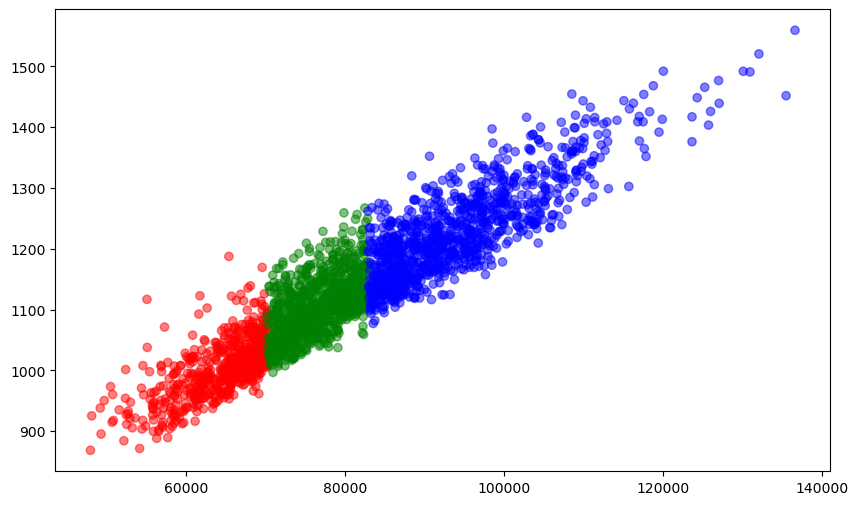

In [4]:
# Assign colors for each cluster
colors = ["r", "g", "b"]
pandas_data["color"] = pandas_data["prediction"].apply(lambda x: colors[x])

# Create a scatter plot
plt.figure(figsize=(10, 6))

for cluster_id in range(k):
    cluster_data = pandas_data[pandas_data["prediction"] == cluster_id]
    plt.scatter(
        cluster_data[feature_cols[0]],
        cluster_data[feature_cols[1]],
        c=cluster_data["color"],
        label=f"Cluster {cluster_id}",
        alpha=0.5,
    )